## Plot the result for a 1 dimensional nonlinear estimation example

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Problem related
mu_p = 20
sig_p_sq = 9
f = 400
b = 0.1
sig_r_sq = 0.09
y = f * b / mu_p - 0.8

niters = 10
ss = 0.75
B = 1
p = 20
mu = mu_p
sig_sq = sig_p_sq
prec = 1 / sig_sq

# *****************************  phi(x) ************************** (85)
T = 1
x = np.linspace(0, 30, 100)  # Assuming x is a range from 0 to 30, adjust as needed
phi = T * ((x - mu_p) ** 2 / (2 * sig_p_sq) + (y - f * b / x) ** 2 / (2 * sig_r_sq))

%matplotlib inline


/tmp/ipykernel_9637/2932518734.py:23: RuntimeWarning: divide by zero encountered in divide
  phi = T * ((x - mu_p) ** 2 / (2 * sig_p_sq) + (y - f * b / x) ** 2 / (2 * sig_r_sq))


---- plotting ----


<Figure size 1200x800 with 0 Axes>

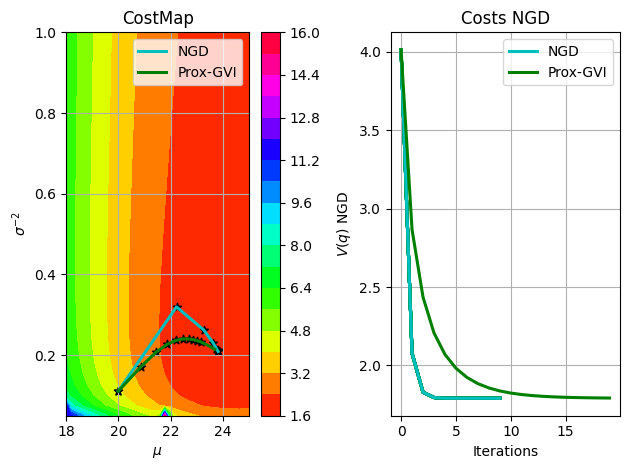

In [4]:
# Display plotting message
print("---- plotting ----")


# Reading the cost map data generated from cpp
cpp_costmap = np.loadtxt("../data/1d_proxgvi/costmap.csv", delimiter=",")
# Read results
cpp_means_prox = np.loadtxt("../data/1d_proxgvi/mean.csv", delimiter=",")
cpp_covs_prox = np.loadtxt("../data/1d_proxgvi/cov.csv", delimiter=",")
cpp_costs_prox = np.loadtxt("../data/1d_proxgvi/cost.csv", delimiter=",")

# NGD
cpp_costmap = np.loadtxt("../data/1d/costmap.csv", delimiter=",")
# Read results
cpp_means = np.loadtxt("../data/1d/mean.csv", delimiter=",")
cpp_covs = np.loadtxt("../data/1d/cov.csv", delimiter=",")
cpp_costs = np.loadtxt("../data/1d/cost.csv", delimiter=",")

cpp_precs_prox = 1.0 / cpp_covs_prox
cpp_precs = 1.0 / cpp_covs

nmesh = 40
x_mesh = np.linspace(18, 25, nmesh)
y_mesh = np.linspace(0.05, 1, nmesh)
X, Y = np.meshgrid(x_mesh, y_mesh)

# ========================= Python iterations =========================
plt.figure(figsize=(12, 8))

fig, (ax1, ax2) = plt.subplots(1, 2)
# Subplot 1
ax1.title.set_text("CostMap")
contour = ax1.contourf(X, Y, cpp_costmap, levels=20, cmap='hsv')
fig.colorbar(contour)
ax1.grid(True)
ax1.plot(cpp_means, cpp_precs, 'c', linewidth=2.2, label='NGD')
for i_iter in range(1, niters + 1):
    ax1.scatter(cpp_means[i_iter - 1], cpp_precs[i_iter - 1], color='k', marker='*')

ax1.plot(cpp_means_prox, cpp_precs_prox, 'g', linewidth=2.2, label='Prox-GVI')
for i_iter in range(1, niters + 1):
    ax1.scatter(cpp_means_prox[i_iter - 1], cpp_precs_prox[i_iter - 1], color='k', marker='*')
    
ax1.legend()
ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$\sigma^{-2}$')

# Subplot 2
ax2.title.set_text(r'Costs NGD')
ax2.grid(True)
for i_iter in range(1, niters + 1):
    ax2.plot(cpp_costs, linewidth=2.2, color='c')
    ax2.plot(cpp_costs, linewidth=2.2, color='g')
    
ax2.plot(cpp_costs, linewidth=2.2, color='c', label='NGD')
ax2.plot(cpp_costs_prox, linewidth=2.2, color='g', label='Prox-GVI')

ax2.legend()
ax2.set_xlabel("Iterations")
ax2.set_ylabel(r'$V(q)$ NGD')

plt.tight_layout()
plt.savefig("figures/1d_NGD.pdf", bbox_inches='tight', dpi=2000)
plt.show()